# Importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing dataset from GitHub.

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [9]:
data.loc[data.Native_country=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [10]:
#for drop null values

data.drop(data[data['Native_country']=='?'].index,inplace=True)
data.drop(data[data['Occupation']=='?'].index,inplace=True)

In [11]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

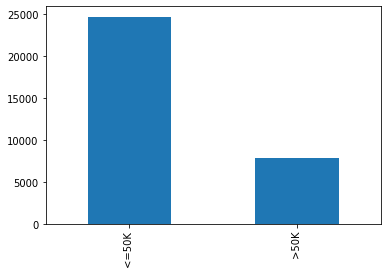

In [12]:
data['Income'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

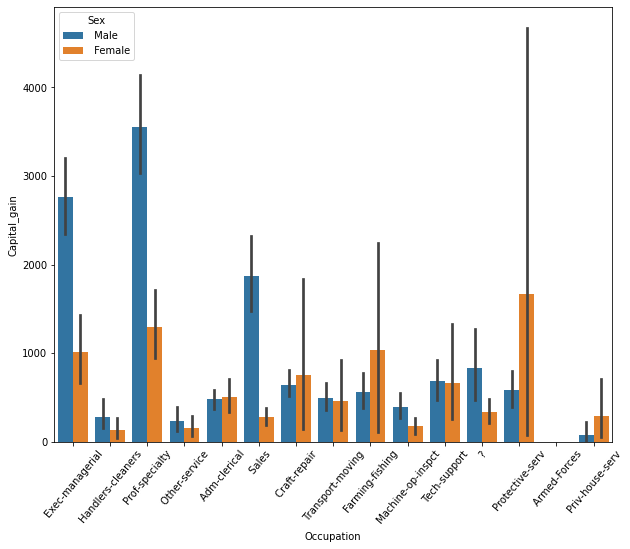

In [13]:
plt.figure(figsize=(10,8))
sns.barplot(x='Occupation',y='Capital_gain',data=data,hue='Sex')
plt.xticks(rotation=50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

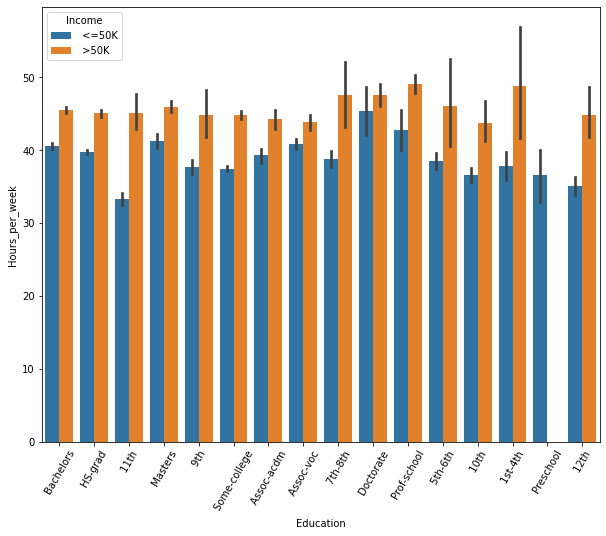

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(x='Education',y='Hours_per_week',data=data,hue='Income')
plt.xticks(rotation=60)

# Data preprocessing and Feature engineering

In [15]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [16]:
label_encoder=LabelEncoder()
data['Income']=label_encoder.fit_transform(data['Income'])
data['Sex']=label_encoder.fit_transform(data['Sex'])

In [17]:
data=pd.get_dummies(data,drop_first=True)
pd.set_option('display.max_columns',100)

In [18]:
data.head()

,Age,Fnlwgt,Education_num,Sex,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,Education_ 1st-4th,Education_ 5th-6th,Education_ 7th-8th,Education_ 9th,Education_ Assoc-acdm,Education_ Assoc-voc,Education_ Bachelors,Education_ Doctorate,Education_ HS-grad,Education_ Masters,Education_ Preschool,Education_ Prof-school,Education_ Some-college,Marital_status_ Married-AF-spouse,Marital_status_ Married-civ-spouse,Marital_status_ Married-spouse-absent,Marital_status_ Never-married,Marital_status_ Separated,Marital_status_ Widowed,Occupation_ Adm-clerical,Occupation_ Armed-Forces,Occupation_ Craft-repair,Occupation_ Exec-managerial,Occupation_ Farming-fishing,Occupation_ Handlers-cleaners,Occupation_ Machine-op-inspct,Occupation_ Other-service,Occupation_ Priv-house-serv,Occupation_ Prof-specialty,Occupation_ Protective-serv,Occupation_ Sales,Occupation_ Tech-support,...,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Race_ Asian-Pac-Islander,Race_ Black,Race_ Other,Race_ White,Native_country_ Cambodia,Native_country_ Canada,Native_country_ China,Native_country_ Columbia,Native_country_ Cuba,Native_country_ Dominican-Republic,Native_country_ Ecuador,Native_country_ El-Salvador,Native_country_ England,Native_country_ France,Native_country_ Germany,Native_country_ Greece,Native_country_ Guatemala,Native_country_ Haiti,Native_country_ Holand-Netherlands,Native_country_ Honduras,Native_country_ Hong,Native_country_ Hungary,Native_country_ India,Native_country_ Iran,Native_country_ Ireland,Native_country_ Italy,Native_country_ Jamaica,Native_country_ Japan,Native_country_ Laos,Native_country_ Mexico,Native_country_ Nicaragua,Native_country_ Outlying-US(Guam-USVI-etc),Native_country_ Peru,Native_country_ Philippines,Native_country_ Poland,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,1,0,0,40,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
scaler = StandardScaler()
col = data[['Age','Fnlwgt','Education_num','Hours_per_week']]
col_scl = scaler.fit_transform(col)

col_scl = pd.DataFrame(col_scl,columns=col.columns)

data['Age']=col_scl['Age']
data['Fnlwgt']=col_scl['Fnlwgt']
data['Education_num']=col_scl['Education_num']
data['Hours_per_week']=col_scl['Hours_per_week']

In [20]:
X = data.drop(['Income'],axis=1)
y = data['Income']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [22]:
#LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
print("LR_Score :",lr.score(X_train,y_train))

LR_Score : 0.8452088452088452


In [23]:
#RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("RF_Score :",rf.score(X_train,y_train))

RF_Score : 0.9999232186732187


In [24]:
#XGBoost

xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)
print("XGB_Score :",xgboost.score(X_train,y_train))

XGB_Score : 0.8661701474201474


# Model Evaluation

In [25]:
lr_ypred = lr.predict(X_test)
rf_ypred = rf.predict(X_test)
xgboost_ypred = xgboost.predict(X_test)

In [26]:
lr_conf_mat = confusion_matrix(y_test,lr_ypred)
print("confusion_matrix for LR model",'\n',lr_conf_mat)

confusion_matrix for LR model 
 [[4622  338]
 [ 658  894]]


In [27]:
rf_conf_mat = confusion_matrix(y_test,rf_ypred)
print("confusion_matrix for RF model",'\n',rf_conf_mat)

confusion_matrix for RF model 
 [[4622  338]
 [ 594  958]]


In [28]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_ypred)
print("confusion_matrix for XGB model",'\n',xgboost_conf_mat)

confusion_matrix for XGB model 
 [[4732  228]
 [ 649  903]]


In [29]:
lr_report = classification_report(y_test,lr_ypred)
print("LR classifiction_report :",'\n',lr_report)

LR classifiction_report : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4960
           1       0.73      0.58      0.64      1552

    accuracy                           0.85      6512
   macro avg       0.80      0.75      0.77      6512
weighted avg       0.84      0.85      0.84      6512



In [30]:
rf_report = classification_report(y_test,rf_ypred)
print("RF classifiction_report :",'\n',rf_report)

RF classifiction_report : 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4960
           1       0.74      0.62      0.67      1552

    accuracy                           0.86      6512
   macro avg       0.81      0.77      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [31]:
xgboost_report = classification_report(y_test,xgboost_ypred)
print("XGB classifiction_report :",'\n',xgboost_report)

XGB classifiction_report : 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      4960
           1       0.80      0.58      0.67      1552

    accuracy                           0.87      6512
   macro avg       0.84      0.77      0.79      6512
weighted avg       0.86      0.87      0.86      6512



In [32]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [34]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,xgboost.predict(X_test)))

0.7539428832723645
0.7745614399733955
0.7679310774858662


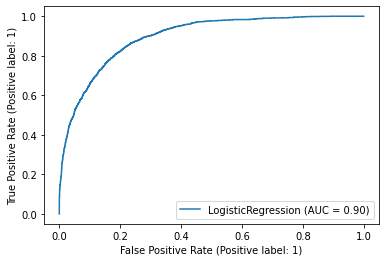

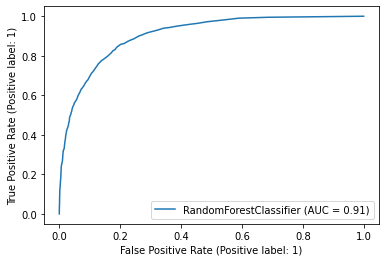

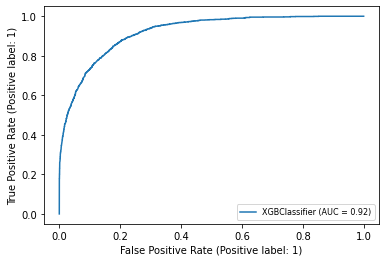

In [36]:
# checking best fitted model

disp = plot_roc_curve(lr,X_test,y_test)
plot_roc_curve(rf,X_test,y_test)
plot_roc_curve(xgboost,X_test,y_test)

plt.legend(prop = {'size':8})

In [37]:
from sklearn.model_selection import GridSearchCV
par_grid = {'max_depth' : [4,5],
           'learning_rate' : [0.1],
           'min_child_weight' : [1,2],
           'random_state' : [5,6]}
par_grid

{'max_depth': [4, 5],
 'learning_rate': [0.1],
 'min_child_weight': [1, 2],
 'random_state': [5, 6]}

In [38]:
grid_search = GridSearchCV(xgboost,param_grid = par_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1], 'max_depth': [4, 5],
                         'min_child_weight': [1, 2], 'random_state': [5, 6]})

In [39]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 1,
 'random_state': 5}

In [40]:
xgboost_tuning=XGBClassifier(learning_rate=0.1,max_depth = 5,min_child_weight = 1,random_state = 5)

xgboost_tuning.fit(X_train,y_train)

XGBClassifier(max_depth=5, random_state=5)

In [41]:
xgboost_tuning_ypred = xgboost_tuning.predict(X_test)
xgboost_report = classification_report(y_test,xgboost_tuning_ypred)
print("XGBoost Classification report",'\n',xgboost_report)

XGBoost Classification report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      4960
           1       0.80      0.62      0.70      1552

    accuracy                           0.87      6512
   macro avg       0.85      0.79      0.81      6512
weighted avg       0.87      0.87      0.87      6512

